In [1]:
import cv2
import json
import numpy as np
from fastprogress import progress_bar
from glob import glob
import os
import pandas as pd

root_path = 'path/to/your/data/'
files = glob(f'{root_path}internal_data/**/**/*.json')

In [4]:
data = []
for file in progress_bar(files):
    cam = file.split('/')[-3]
    subject = file.split('/')[-2]
    combination = file.split('/')[-1].split('.')[0]
    action = f"A{combination.split('A')[1].split('D')[0]}"
    duration = f"D{combination.split('D')[1]}"
    with open(file, 'r') as f:
        frames = json.load(f)
    num_frames = len(frames)
    data.append({
        'cam': cam,
        'subject': subject,
        'combination': combination,
        'action': action,
        'speed': duration,
        'num_frames': num_frames
    })
df = pd.DataFrame(data)
df.to_csv(f'{root_path}data/internal_data_stats.csv', index=False)
    

In [5]:
df.head()

,cam,subject,combination,action,speed,num_frames
0,C1,S1,S1A1D1,A1,D1,2521
1,C1,S1,S1A1D2,A1,D2,1468
2,C1,S1,S1A3D1,A3,D1,1206
3,C1,S1,S1A3D2,A3,D2,672
4,C1,S1,S1A4D1,A4,D1,1335


In [7]:
# Group by action and speed, and calculate the total items and num_frames
summary = df.groupby(['action', 'speed']).agg(
    total_items=('speed', 'size'),
    total_num_frames=('num_frames', 'sum')
).reset_index()

# Pivot the table to get speeds as columns
pivot_items = summary.pivot_table(
    index='action', 
    columns='speed', 
    values='total_items', 
    fill_value=0, 
    aggfunc=sum
)

pivot_frames = summary.pivot_table(
    index='action', 
    columns='speed', 
    values='total_num_frames', 
    fill_value=0, 
    aggfunc=sum
)

# Calculate the Total column for each action
pivot_items['Total Items'] = pivot_items.sum(axis=1)
pivot_frames['Total Num Frames'] = pivot_frames.sum(axis=1)

# Concatenate the items and frames tables
pivot_table = pd.concat([pivot_items, pivot_frames], axis=1)

# Calculate the Total row
total_items_row = pivot_items.sum().to_frame().T
total_items_row.index = ['Total']
total_frames_row = pivot_frames.sum().to_frame().T
total_frames_row.index = ['Total']

# Append the total row to the pivot table
total_row = pd.concat([total_items_row, total_frames_row], axis=1)
result = pd.concat([pivot_table, total_row])

print(result)

speed    D1    D2    D3  Total Items       D1       D2      D3  \
A1      162   156     0          318   202458   156867       0   
A3      168   168   162          498   224733   157249  107463   
A4      162   168   168          498   249447   219288  169878   
A5      168   168   168          504   256794   199186  158103   
A6      168   162   168          498   264432   191016  153352   
A7      162   162   162          486   248738   178860  139227   
A8      168   162   168          498   201642   138149  111093   
A9      162   168   168          498   147134   101879   84585   
Total  1320  1314  1164         3798  1795378  1342494  923701   

speed  Total Num Frames  
A1               359325  
A3               489445  
A4               638613  
A5               614083  
A6               608800  
A7               566825  
A8               450884  
A9               333598  
Total           4061573  


/tmp/ipykernel_351918/1508462181.py:8: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_items = summary.pivot_table(
/tmp/ipykernel_351918/1508462181.py:16: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_frames = summary.pivot_table(


In [9]:
pivot_action_cam = df.pivot_table(
    index='action',  # Rows
    columns='cam',  # Columns
    values='num_frames',  # Values to aggregate
    aggfunc='sum',  # Aggregate function to sum the num_frames
    fill_value=0  # Fill missing values with 0
)

# Calculate the total frames per action (row) and per camera (column)
pivot_action_cam['Total Num Frames (Action)'] = pivot_action_cam.sum(axis=1)
pivot_action_cam.loc['Total Num Frames (Camera)'] = pivot_action_cam.sum(axis=0)

# Display the resulting table
print(pivot_action_cam)

cam                            C1      C2      C3      C4      C5      C6  \
action                                                                      
A1                          59671   59671   59671   60104   60104   60104   
A3                          83686   83686   82805   79756   79756   79756   
A4                         107976  107976  107976  104895  104895  104895   
A5                         105682  105682  104453   99422   99422   99422   
A6                         103080  102035  102035  100550  100550  100550   
A7                          95850   95850   94388   93579   93579   93579   
A8                          76308   76308   74105   74988   74187   74988   
A9                          56077   56077   54433   56015   54981   56015   
Total Num Frames (Camera)  688330  687285  679866  669309  667474  669309   

cam                        Total Num Frames (Action)  
action                                                
A1                                        

In [9]:
data = {
    "S1": {
        "age": 25,
        "sex": "Female",
        "skintone_scale": 2,
        "weight": 58,
        "height": 168,
        "weights_hours": 2,
        "cardio_hours": 1.5,
        "work_intensity": "None" 
    },
    "S2": {
        "age": 22,
        "sex": "Female",
        "skintone_scale": 3,
        "weight": 61,
        "height": 170,
        "weights_hours": 3,
        "cardio_hours": 3,
        "work_intensity": "High"
    },
    "S3": {
        "age": 23,
        "sex": "Male",
        "skintone_scale": 2,
        "weight": 64,
        "height": 174,
        "weights_hours": 2,
        "cardio_hours": 6,
        "work_intensity": "None"
    },
    "S4": {
        "age": 25,
        "sex": "Female",
        "skintone_scale": 4,
        "weight": 56.1,
        "height": 163,
        "weights_hours": 2,
        "cardio_hours": 5,
        "work_intensity": "None"
    },
    "S6": {
        "age": 25,
        "sex": "Male",
        "skintone_scale": 2,
        "weight": 72,
        "height": 188,
        "weights_hours": 3,
        "cardio_hours": 3,
        "work_intensity": "None"
    },
    "S7": {
        "age": 24,
        "sex": "Male",
        "skintone_scale": 1,
        "weight": 83,
        "height": 180,
        "weights_hours": 6,
        "cardio_hours": 2,
        "work_intensity": "None"
    },
    "S8": {
        "age": 24,
        "sex": "Male",
        "skintone_scale": 2,
        "weight": 88,
        "height": 181,
        "weights_hours": 10,
        "cardio_hours": 1,
        "work_intensity": "Medium"
    },
    "S9": {
        "age": 25,
        "sex": "Male",
        "skintone_scale": 3,
        "weight": 82,
        "height": 192,
        "weights_hours": 0,
        "cardio_hours": 2,
        "work_intensity": "None"
    },
    "S11": {
        "age": 21,
        "sex": "Male",
        "skintone_scale": 4,
        "weight": 80,
        "height": 192,
        "weights_hours": 3,
        "cardio_hours": 2,
        "work_intensity": "None"
    },
    "S12": {
        "age": 22,
        "sex": "Male",
        "skintone_scale": 2,
        "weight": 66.3,
        "height": 182,
        "weights_hours": 2,
        "cardio_hours": 5,
        "work_intensity": "High"
    },
    "S13": {
        "age": 26,
        "sex": "Male",
        "skintone_scale": 3,
        "weight": 85,
        "height": 193,
        "weights_hours": 1,
        "cardio_hours": 3,
        "work_intensity": "None"
    },
    "S14": {
        "age": 23,
        "sex": "Female",
        "skintone_scale": 3,
        "weight": 55,
        "height": 158,
        "weights_hours": 3,
        "cardio_hours": 2,
        "work_intensity": "Medium"
    },
    "S15": {
        "age": 24,
        "sex": "Male",
        "skintone_scale": 3,
        "weight": 103,
        "height": 184,
        "weights_hours": 2,
        "cardio_hours": 3,
        "work_intensity": "Medium"
    },
    "S16": {
        "age": 24,
        "sex": "Male",
        "skintone_scale": 2,
        "weight": 86,
        "height": 187,
        "weights_hours": 2,
        "cardio_hours": 0.5,
        "work_intensity": "High"
    },
    "S17": {
        "age": 23,
        "sex": "Female",
        "skintone_scale": 1,
        "weight": 60,
        "height": 161,
        "weights_hours": 3,
        "cardio_hours": 6,
        "work_intensity": "None"
    },
    "S18": {
        "age": 21,
        "sex": "Male",
        "skintone_scale": 5,
        "weight": 85,
        "height": 175,
        "weights_hours": 4,
        "cardio_hours": 2,
        "work_intensity": "Medium"
    },
    "S19": {
        "age": 24,
        "sex": "Female",
        "skintone_scale": 1,
        "weight": 85,
        "height": 173,
        "weights_hours": 3,
        "cardio_hours": 3,
        "work_intensity": "None"
    },
    "S20": {
        "age": 24,
        "sex": "Male",
        "skintone_scale": 4,
        "weight": 75,
        "height": 185,
        "weights_hours": 1,
        "cardio_hours": 10,
        "work_intensity": "None"
    },
    "S21": {
        "age": 24,
        "sex": "Male",
        "skintone_scale": 5,
        "weight": 72,
        "height": 172,
        "weights_hours": 0,
        "cardio_hours": 4,
        "work_intensity": "None"
    },
    "S22": {
        "age": 24,
        "sex": "Male",
        "skintone_scale": 4,
        "weight": 73,
        "height": 179,
        "weights_hours": 0,
        "cardio_hours": 2,
        "work_intensity": "Medium"
    },
    "S23": {
        "age": 22,
        "sex": "Female",
        "skintone_scale": 4,
        "weight": 62,
        "height": 160,
        "weights_hours": 2,
        "cardio_hours": 5,
        "work_intensity": "None"
    },
    "S24": {
        "age": 22,
        "sex": "Female",
        "skintone_scale": 2,
        "weight": 65,
        "height": 161,
        "weights_hours": 2,
        "cardio_hours": 9,
        "work_intensity": "None"
    },
    "S25": {
        "age": 23,
        "sex": "Female",
        "skintone_scale": 3,
        "weight": 70,
        "height": 169,
        "weights_hours": 2,
        "cardio_hours": 5,
        "work_intensity": "None"
    },
    "S26": {
        "age": 24,
        "sex": "Female",
        "skintone_scale": 4,
        "weight": 70,
        "height": 175,
        "weights_hours": 0,
        "cardio_hours": 3,
        "work_intensity": "Medium"
    },
    "S27": {
        "age": 22,
        "sex": "Female",
        "skintone_scale": 2,
        "weight": 69,
        "height": 165,
        "weights_hours": 0,
        "cardio_hours": 5,
        "work_intensity": "Medium"
    },
    "S28": {
        "age": 26,
        "sex": "Male",
        "skintone_scale": 5,
        "weight": 71.4,
        "height": 168,
        "weights_hours": 10,
        "cardio_hours": 4,
        "work_intensity": "High"
    }
}


In [11]:
import pandas as pd
df_data = []
for key, value in data.items():
    subject = key
    age = value['age']
    sex = value['sex']
    skintone_scale = value['skintone_scale']
    weight = value['weight']
    height = value['height']
    weights_hours = value['weights_hours']
    cardio_hours = value['cardio_hours']
    work_intensity = value['work_intensity']
    df_data.append([subject, age, sex, skintone_scale, weight, height, weights_hours, cardio_hours, work_intensity])
df = pd.DataFrame(df_data, columns=['subject', 'age', 'sex', 'skintone_scale', 'weight', 'height', 'weights_hours', 'cardio_hours', 'work_intensity'])
df.to_csv(f'{root_path}subject_info.csv', index=False)

In [21]:
df.head()

,subject,age,sex,skintone_scale,weight,height,weights_hours,cardio_hours,work_intensity
0,S1,25,Female,1,58.0,168,2,1.5,None
1,S2,22,Female,2,61.0,170,3,3.0,High
2,S3,23,Male,2,64.0,174,2,6.0,None
3,S4,25,Female,3,56.1,163,2,5.0,None
4,S6,25,Male,1,72.0,188,3,3.0,None


In [10]:
# Numerical fields statistics
numerical_stats = df.describe().T

# Categorical fields statistics
categorical_stats = df.describe(include=['object']).T

# Count of unique values for the 'sex' column
unique_sex_counts = df['sex'].value_counts()
unique_sex_percentages = df['sex'].value_counts(normalize=True) * 100

# Adding count and percentage of unique sexes to the categorical_stats DataFrame
sex_stats = pd.DataFrame({
    'count': [df['sex'].count()],
    'unique': [df['sex'].nunique()],
    'top': [df['sex'].mode()[0]],
    'freq': [df['sex'].value_counts().max()],
    'male_count': [unique_sex_counts.get('Male', 0)],
    'female_count': [unique_sex_counts.get('Female', 0)],
    'male_percentage': [unique_sex_percentages.get('Male', 0)],
    'female_percentage': [unique_sex_percentages.get('Female', 0)],
}).T.rename(columns={0: 'sex'})

# Combine numerical, categorical statistics, and sex statistics into a single table
combined_stats = pd.concat([numerical_stats, categorical_stats, sex_stats], axis=0)

# Display the resulting summary table
print(combined_stats)

                  count        mean        std    min     25%    50%     75%  \
age                26.0   23.538462   1.392286   21.0   22.25   24.0   24.00   
skintone_scale     26.0    2.961538   1.280024    1.0    2.00    3.0    4.00   
weight             26.0   72.953846  11.759260   55.0   64.25   71.7   82.75   
height             26.0  175.192308  10.665905  158.0  168.00  174.5  183.50   
weights_hours      26.0    2.615385   2.578014    0.0    1.25    2.0    3.00   
cardio_hours       26.0    3.730769   2.276975    0.5    2.00    3.0    5.00   
subject              26         NaN        NaN    NaN     NaN    NaN     NaN   
sex                  26         NaN        NaN    NaN     NaN    NaN     NaN   
work_intensity       26         NaN        NaN    NaN     NaN    NaN     NaN   
count               NaN         NaN        NaN    NaN     NaN    NaN     NaN   
unique              NaN         NaN        NaN    NaN     NaN    NaN     NaN   
top                 NaN         NaN     

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np


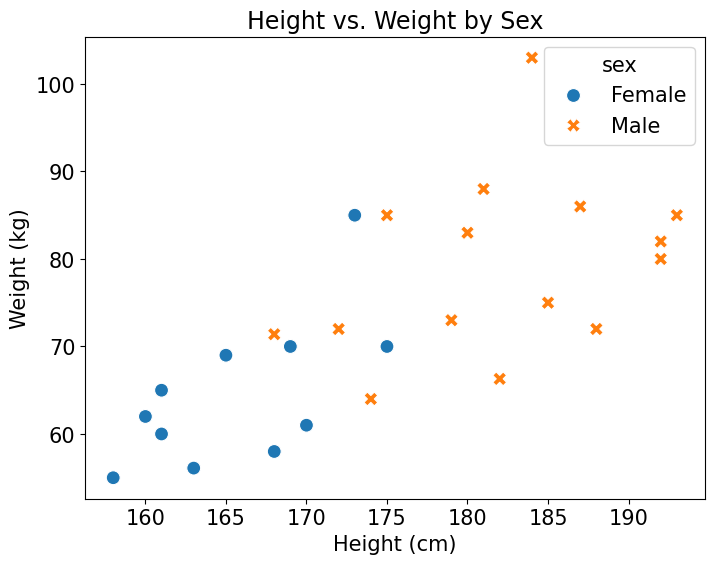

/tmp/ipykernel_3007974/2730996700.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='skintone_scale', data=df, palette='viridis', order=range(1, 11))


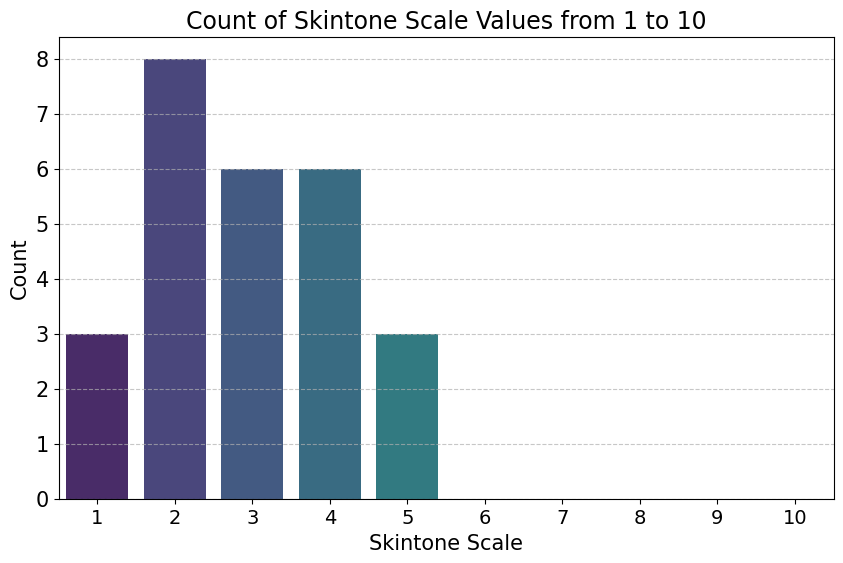

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv(f'{root_path}subject_info.csv')

# Set general font size for all text elements
plt.rcParams.update({'font.size': 15})

# 1. Scatter Plot for Height vs. Weight Colored by Sex
plt.figure(figsize=(8, 6))
sns.scatterplot(x='height', y='weight', hue='sex', data=df, style='sex', s=100)

# Customize text size for title and labels
plt.title('Height vs. Weight by Sex', fontsize=17)
plt.xlabel('Height (cm)', fontsize=15)
plt.ylabel('Weight (kg)', fontsize=15)

# Save plot at 600 DPI
plt.savefig(f'scatter_height_weight.png', dpi=600, bbox_inches='tight')
plt.show()

# 2. Count Plot for Skintone Scale
plt.figure(figsize=(10, 6))
sns.countplot(x='skintone_scale', data=df, palette='viridis', order=range(1, 11))

# Customize text size for title and labels
plt.title('Count of Skintone Scale Values from 1 to 10', fontsize=17)
plt.xlabel('Skintone Scale', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(ticks=range(10), labels=range(1, 11), fontsize=14)

# Add a grid and save the plot at 600 DPI
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.savefig(f'count_skintone_scale.png', dpi=600, bbox_inches='tight')
plt.show()
